# Planar data classification with one hidden layer

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [2]:
# load dataset
X, Y = load_planar_dataset()
print(f"shape of X: {np.shape(X)}")
print(f"shape of Y: {np.shape(Y)}")
print(f"training size is {np.shape(X)[1]}")

shape of X: (2, 400)
shape of Y: (1, 400)
training size is 400


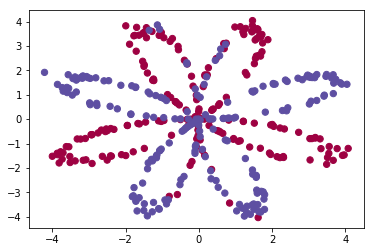

In [52]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral);

# a numpy-array (matrix) X that contains your features (x1, x2)
# a numpy-array (vector) Y that contains your labels (red:0, blue:1).

In [13]:
# before building neural network, let's build a simple logistic regression model
from sklearn.linear_model import LogisticRegressionCV
clf_lr = LogisticRegressionCV().fit(X.T, Y.T)

c:\users\leifu\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\leifu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [14]:
clf_lr.score(X.T, Y.T)

0.47

In [5]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :],c=np.squeeze(y), cmap=plt.cm.Spectral)

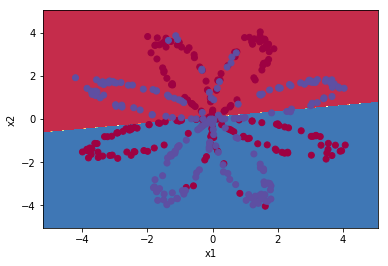

In [6]:
# plot decision boundary
plot_decision_boundary(clf.predict,X,Y)

### neural network with one hidden layer

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:550px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$


In [113]:
from sklearn.neural_network import MLPClassifier

clf_n = MLPClassifier(hidden_layer_sizes=(4,),activation="tanh",solver='adam',learning_rate="constant", learning_rate_init=0.2,max_iter = 10000)
clf_n.fit(X.T, Y.ravel().T) 

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.2, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [114]:
clf_n.score(X.T, Y.T)

0.9075

In [115]:
predictions = clf_n.predict(X.T)

In [116]:
sum(np.equal(predictions,Y.ravel()))/predictions.size

0.9075

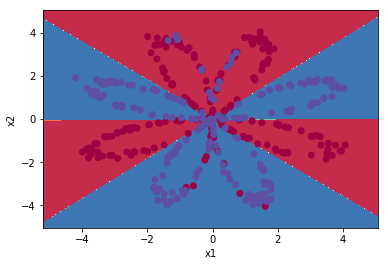

In [117]:
# plot decision boundary
plot_decision_boundary(clf_n.predict,X,Y)

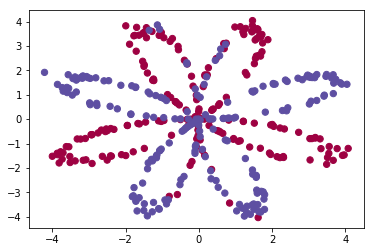

In [118]:
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)

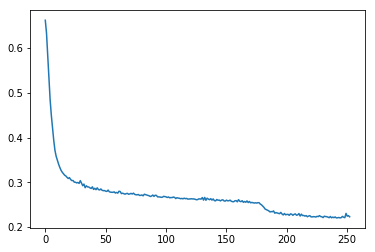

In [119]:
plt.plot(clf_n.loss_curve_)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(Y.ravel(), predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       200
           1       0.91      0.91      0.91       200

   micro avg       0.91      0.91      0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [121]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y[0], predictions))

[[181  19]
 [ 18 182]]
